In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import pad_sequences
import nltk
import re
nltk.download('stopwords')
import nltk.tokenize as token
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer, TreebankWordTokenizer, TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
stop_words = set(stopwords.words('english'))
from nltk.util import everygrams, pad_sequence
import string

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000
...,...,...,...,...,...,...
2249693,2422167,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,Material : Polyester,NaN,3009,1181.100000
2249694,2766635,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",[❤ [Inspiration] Inspired by the Untitled Goos...,<p><b>[Brand]: </b>XVIEONR</p> <p><br></p> <p>...,3413,125.984252
2249695,1987786,Kangroo Sweep Movement Printed Wooden Wall Clo...,"[Dial size: 12 inches in diameter,Big, clear r...",Wall Clocks Are Very Attractive In Looks And E...,1574,1200.000000
2249696,1165754,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,NaN,NaN,592,2900.000000


In [ ]:
df.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,2.249698e+06,2.249698e+06,2.249698e+06
mean,1.499795e+06,4.000456e+03,4.071839e+03
std,8.661944e+05,3.966146e+03,1.351685e+06
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,7.494795e+05,2.300000e+02,5.118110e+02
50%,1.499558e+06,2.916000e+03,6.630000e+02
75%,2.250664e+06,6.403000e+03,1.062992e+03
max,2.999999e+06,1.342000e+04,1.885801e+09


<AxesSubplot: xlabel='PRODUCT_LENGTH', ylabel='Count'>

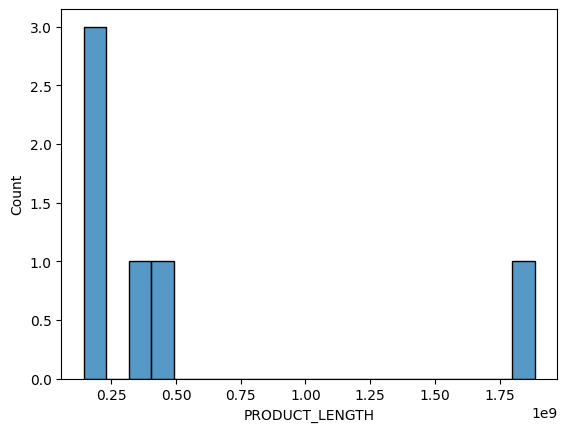

In [ ]:
sns.histplot(x="PRODUCT_LENGTH",data=df.loc[df["PRODUCT_LENGTH"]>1e8],bins=20)

In [ ]:
df.loc[df["PRODUCT_LENGTH"]>1e8]

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
134612,953114,"May Arts Ribbon, Pink Burlap String","[Best Quality,May Arts,Original]",Burlap String 1mmX400yd-Pink,11191,1.440000e+08
238700,2263460,TOPBATHY 1 Set Ladle Colander Spoon Stainless ...,[gravy food fat separator They will bring you ...,<b> Features</b><br/><br/> Color: Silver<br/> ...,11601,1.774080e+08
784310,1965723,Dinewell Wooden Pizza Plate/Racket/Bat/Board/G...,[BEAUTIFUL: Natural acacia wood is designed to...,Everybody has their own sense of style. Which ...,1393,2.249280e+08
888442,840563,WinCraft NCAA Ohio State University Multi-Use ...,"[Officially licensed product,Quality materials...",Ohio State Ultra Decal Removable Vinyl Sticker...,6030,1.885801e+09
1082317,2746964,"Shri Rajeshwar Medical Monisons Pain Balm, 100...","Ingredients: Pudinah Ka Phool, Wintergreen, Ni...",Monisons Pain Balm is an ointment made using h...,12069,3.937010e+08
1584254,2526801,Ranrox Combo Weight Lifting Rods(Curl Rod +Str...,[Benefits: Build and engage muscles in your ar...,Ranrox Weight Lifting Rod Chrome Plated Steel ...,4252,4.803152e+08


In [ ]:
# https://www.amazon.in/Dinewell-Wooden-Homemade-Platter-Restaurant/dp/B08HKB3841
print(df.iloc[238700,5]/45061.63)
# https://www.amazon.in/TOPBATHY-Colander-Stainless-Separator-Skimmer/dp/B094G57RS9
print(df.iloc[784310,5]/57131.71)
## Product Length is of Unit inch/100
## 12 inch == 1200 in Product Length

3937.0080487545615
3937.008011837909


In [ ]:
df["PRODUCT_TYPE_ID"].value_counts()

1        121199
12064     57554
0         50505
123       31527
6104      29690
          ...  
7239          1
12536         1
4114          1
3229          1
4505          1
Name: PRODUCT_TYPE_ID, Length: 12907, dtype: int64

<AxesSubplot: >

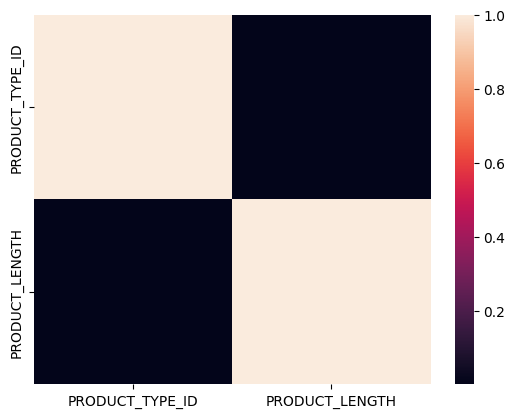

In [ ]:
sns.heatmap(df[["PRODUCT_TYPE_ID","PRODUCT_LENGTH"]].corr())

In [ ]:
df.isnull().sum()/len(df)

PRODUCT_ID         0.000000
TITLE              0.000005
BULLET_POINTS      0.372212
DESCRIPTION        0.514461
PRODUCT_TYPE_ID    0.000000
PRODUCT_LENGTH     0.000000
dtype: float64

In [ ]:
duplicates = df.duplicated(subset=['TITLE', 'BULLET_POINTS','DESCRIPTION'])
display(df[duplicates])
print(df[duplicates].shape[0]/len(df))

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
1851,845789,Honey,NaN,NaN,837,574.000000
7572,60385,Dirty Magic,NaN,NaN,41,532.000000
9220,72091,Ceremony,NaN,NaN,103,700.000000
16751,2342585,180 KARRERA MOTOCROSS JERSEY,"[Moisture-wicking fabric provides a soft, ligh...",NaN,8041,1200.000000
18312,2019285,Outdoor Patio Furniture Covers Waterproof Rect...,[Material: The furniture cover is made of high...,Note: The coverage depends on the size of the ...,5600,9448.818888
...,...,...,...,...,...,...
2249532,477318,The German Shepherd Big Book: All About the Ge...,NaN,NaN,83,600.000000
2249551,2761482,"Yaiewey Long Cardigans for Women, Womens Light...",[winter coats for women trench coats for women...,pullover womens hoodies plus size hoodies for ...,2991,590.551180
2249600,1346248,Morning Song,NaN,NaN,7,551.180000
2249648,586218,God's Hand Upon My Life,NaN,NaN,10507,700.000000


0.014337479963977388


In [ ]:
#Duplicates and Null Value Removal
df = df.drop_duplicates(subset=['TITLE', 'BULLET_POINTS', 'DESCRIPTION'])
df = df.dropna(subset=['TITLE'])

In [ ]:
def lemmatizer_on_text(data):
    lm = nltk.WordNetLemmatizer()
    text = [lm.lemmatize(word) for word in data]
    return convert_to_lower(text)
def stem_on_text(data):
    st = nltk.PorterStemmer()
    text = [st.stem(word) for word in data]
    return lemmatizer_on_text(text)
def convert_to_lower(text):
    # return the reviews after convering then to lowercase
    # Words with different cases are intercepted differently such as 'The' and 'the'. 
    # Hence all words should be converted into same case, preferably lower case.
    l = []
    for t in text:
        l.append(t.lower())
    return remove_digits(l)

def remove_digits(text):
    l = []
    for t in text:
        # t=TreebankWordDetokenizer().detokenize(t)
        t= re.sub(r'[0-9]','',t)
        l.append(t)
    return remove_punctuation(l)

def remove_punctuation(text):
    # return the reviews after removing punctuations
    # Refer: https://www3.ntu.edu.sg/home/ehchua/programming/howto/Regexe.html
    l = []
    # \w : word character
    # \W : non-word character
    # \d : digits
    # \D : non-digits
    
    # for t in text:
    #     l.append(re.sub(r'[^\w\s\d]|^\s\d+\s|\s\d+|\d+|\s\d+$', ' ', t)) #|^\s\d+\s|\s\d+|\d+|\s\d+$
    for t in text:
        # t = re.sub(r'(\d)(?=[^\s\d.]|$)', r'\1 ', t)
        # punctuation = '''!"#$%&'()*+,-/:;<=>?@[\\]^_`{|}~'''
        # punctuation = punctuation.replace('.', '')
        t = t.translate(str.maketrans('', '', string.punctuation))
        l.append(t)
    return remove_stopwords(l)

def remove_stopwords(text):
    l = []
    large = 0
    for t in text:
        word_tokens = token.word_tokenize(t)
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        l.append(TreebankWordDetokenizer().detokenize(filtered_sentence))
    return l

def remove_URLs(text):
    l = []
    for t in text:
        t  = re.sub(r"https?://\S+|www\.\S+", "", t )
        l.append(t)
    return l

In [ ]:
x = lemmatizer_on_text(df["TITLE"])

In [ ]:
def tokenize(text):
    l = []
    for t in text:
        t = TreebankWordTokenizer().tokenize(t)
        l.append(t)
    return l

In [ ]:
x = tokenize(x)

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(x)                    # fit tokeniser on data
X_encoded = word_tokenizer.texts_to_sequences(x)

In [ ]:
MAX_SEQ_LENGTH = 30
X_padded = pad_sequences(X_encoded, maxlen=MAX_SEQ_LENGTH, padding="post", truncating="post")

In [ ]:
X_padded

array([[  1189,   4586,    407, ...,      0,      0,      0],
       [  2496,   2652,     19, ...,      0,      0,      0],
       [  5445,   2305,     21, ...,      0,      0,      0],
       ...,
       [130420,   8262,   2794, ...,      0,      0,      0],
       [ 10031,   2410, 838654, ...,      0,      0,      0],
       [ 23832,  31866,   7408, ...,      0,      0,      0]])

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
path = 'GoogleNews-vectors-negative300.bin'


# load word2vec using the following function present in the gensim library
word2vec = KeyedVectors.load_word2vec_format(path, binary=True)

In [ ]:
EMBEDDING_SIZE  = 300  # each word in word2vec model is represented using a 300 dimensional vector
VOCABULARY_SIZE = len(word_tokenizer.word_index) + 1

# create an empty embedding matix
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))

# create a word to index dictionary mapping
word2id = word_tokenizer.word_index

# copy vectors from word2vec model to the words present in corpus
for word, index in word2id.items():
    try:
        embedding_weights[index, :] = word2vec[word]
    except KeyError:
        pass